## **DATA ANALYSIS PROJECT PYTHON - BLINKIT ANALYSIS**

#### **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Import Raw Data**

In [4]:
df = pd.read_excel("E:/capstone project 1 files/BlinkIT Grocery Data.xlsx")
print(df.head(10))

  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   
5          low fat           FDS52           Frozen Foods   
6          Low Fat           NCU05     Health and Hygiene   
7          Low Fat           NCD30              Household   
8          Low Fat           FDW20  Fruits and Vegetables   
9          Low Fat           FDX25                 Canned   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT0

#### **Size of Data**

In [7]:
print("Size of Data:", df.shape)

Size of Data: (8523, 12)


#### **Field Info**

In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### **Data Types**

In [9]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### **Data Cleaning**

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [11]:
df["Item Fat Content"] = df["Item Fat Content"].replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"})

In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### **BUSINESS REQUIREMENTS**

#### **KPI's REQUIREMENTS**

In [ ]:
# Total Sales
total_sales = df["Sales"].sum()

# Average Sales
avg_sales = df["Sales"].mean()

# No. of Items Sold
no_of_items_sold = df["Sales"].count()

# Average Ratings
avg_ratings = df["Rating"].mean()

# Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print(f"No. of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:,.1f}")

Total Sales: $1,201,681
Average Sales: $141
No. of Items Sold: 8,523
Average Ratings: 4.0


### **CHARTS REQUIREMENTS**

#### **Total Sales by Fat Content**

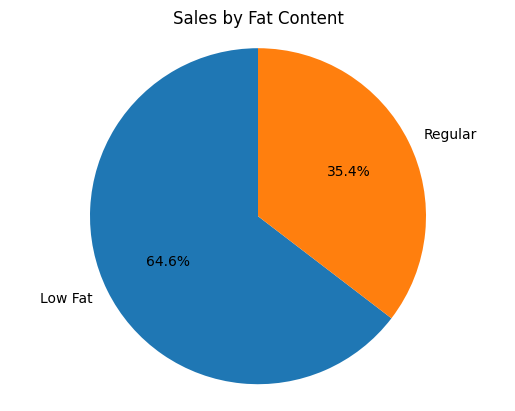

In [18]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum().reset_index()
# print(sales_by_fat)
plt.pie(sales_by_fat["Sales"], labels = sales_by_fat["Item Fat Content"], autopct='%.1f%%', startangle=90)
plt.title("Sales by Fat Content")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### **Total Sales by Item Type**

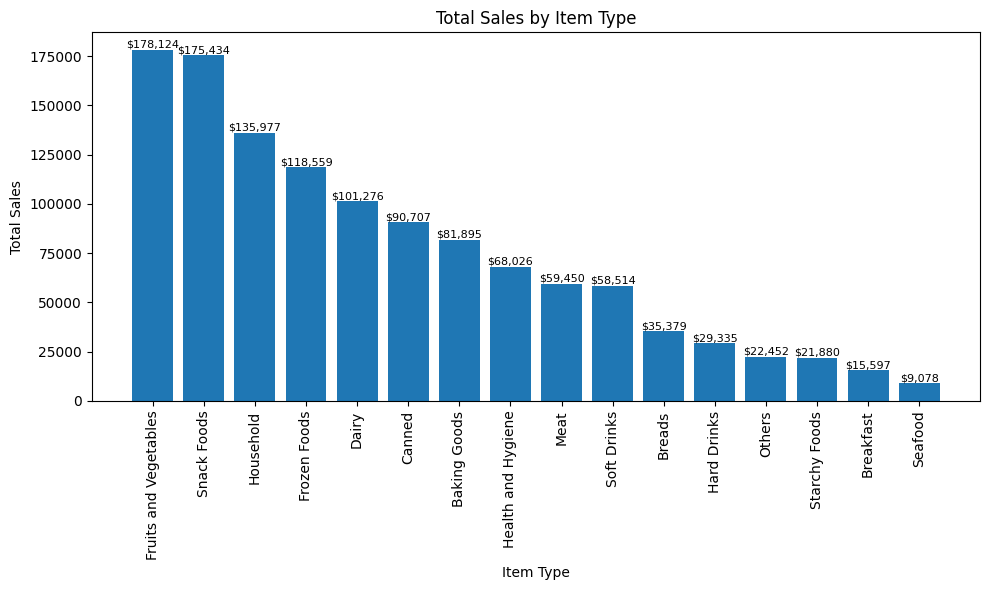

In [24]:
sales_by_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
# print(sales_by_type)
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.title("Total Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Total Sales")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${bar.get_height():,.0f}', ha = "center", va = "bottom", fontsize=8)

plt.tight_layout()              
plt.show()

#### **Fat Content by Outlet for Total Sales**

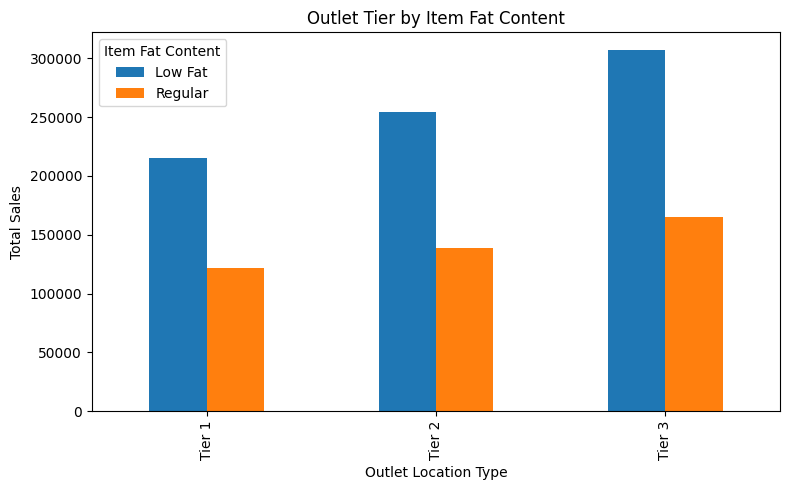

In [25]:
grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()
grouped = grouped[["Low Fat", "Regular"]]

ax = grouped.plot(kind='bar', figsize=(8, 5), title = "Outlet Tier by Item Fat Content")
plt.xlabel("Outlet Location Type")
plt.ylabel("Total Sales")
plt.legend(title="Item Fat Content")
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Establishment**

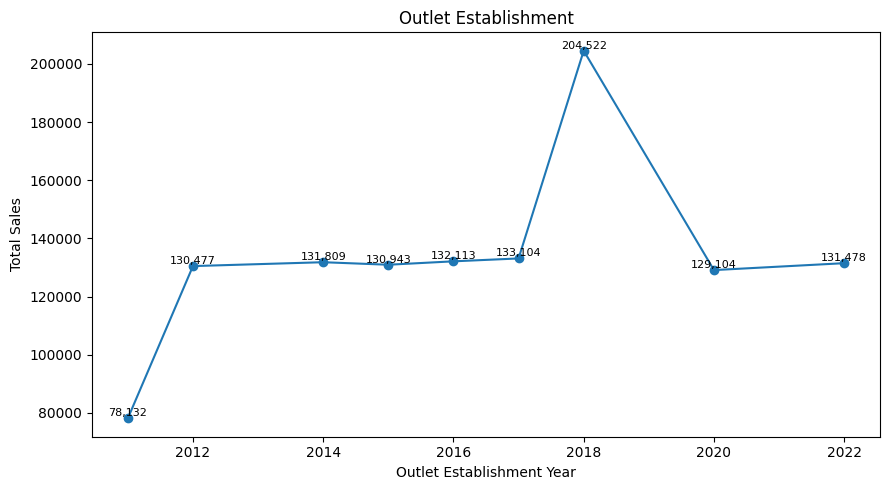

In [28]:
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()
# print(sales_by_year)

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o')

plt.title("Outlet Establishment")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### **Sales by Outlet Size**

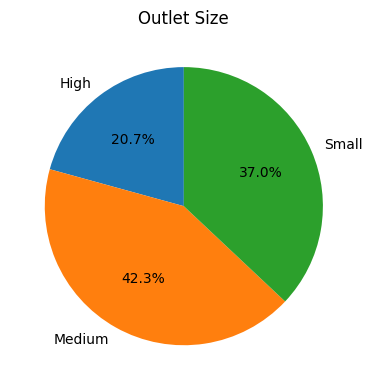

In [30]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title("Outlet Size")
plt.tight_layout()
plt.show()

#### **Sales by Outlet Location**

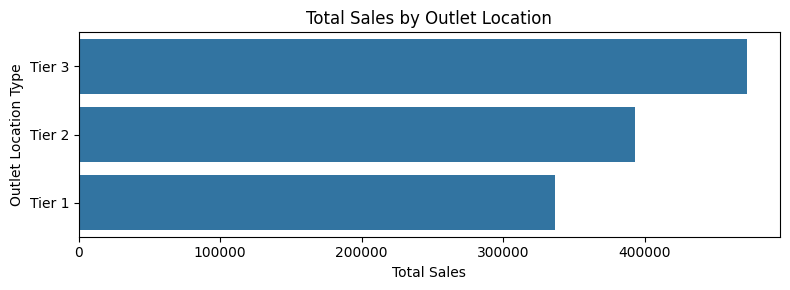

In [32]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by="Sales", ascending=False)
# print(sales_by_location)

plt.figure(figsize=(8, 3))
ax = sns.barplot(x="Sales", y="Outlet Location Type", data=sales_by_location)

plt.title("Total Sales by Outlet Location")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")

plt.tight_layout()
plt.show()